In [7]:
import keras
from keras import Model
from tensorflow.keras import applications
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

vgg=applications.VGG16(include_top=False,weights='imagenet')


In [8]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [9]:
vgg.inputs

[<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_2')>]

In [11]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

model = VGG16()

553476096/553467096 [==============================] - 270s 0us/step


In [12]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])


In [14]:
layer_dict

{'input_3': <keras.engine.input_layer.InputLayer at 0x28403da90>,
 'block1_conv1': <keras.layers.convolutional.Conv2D at 0x287b50ac0>,
 'block1_conv2': <keras.layers.convolutional.Conv2D at 0x2849aa4f0>,
 'block1_pool': <keras.layers.pooling.MaxPooling2D at 0x287b50c40>,
 'block2_conv1': <keras.layers.convolutional.Conv2D at 0x287b642b0>,
 'block2_conv2': <keras.layers.convolutional.Conv2D at 0x287b6d550>,
 'block2_pool': <keras.layers.pooling.MaxPooling2D at 0x287b6d250>,
 'block3_conv1': <keras.layers.convolutional.Conv2D at 0x287b715e0>,
 'block3_conv2': <keras.layers.convolutional.Conv2D at 0x287b778b0>,
 'block3_conv3': <keras.layers.convolutional.Conv2D at 0x287b77af0>,
 'block3_pool': <keras.layers.pooling.MaxPooling2D at 0x287b77b20>,
 'block4_conv1': <keras.layers.convolutional.Conv2D at 0x287b503d0>,
 'block4_conv2': <keras.layers.convolutional.Conv2D at 0x287c040a0>,
 'block4_conv3': <keras.layers.convolutional.Conv2D at 0x287b50100>,
 'block4_pool': <keras.layers.pooling.Ma

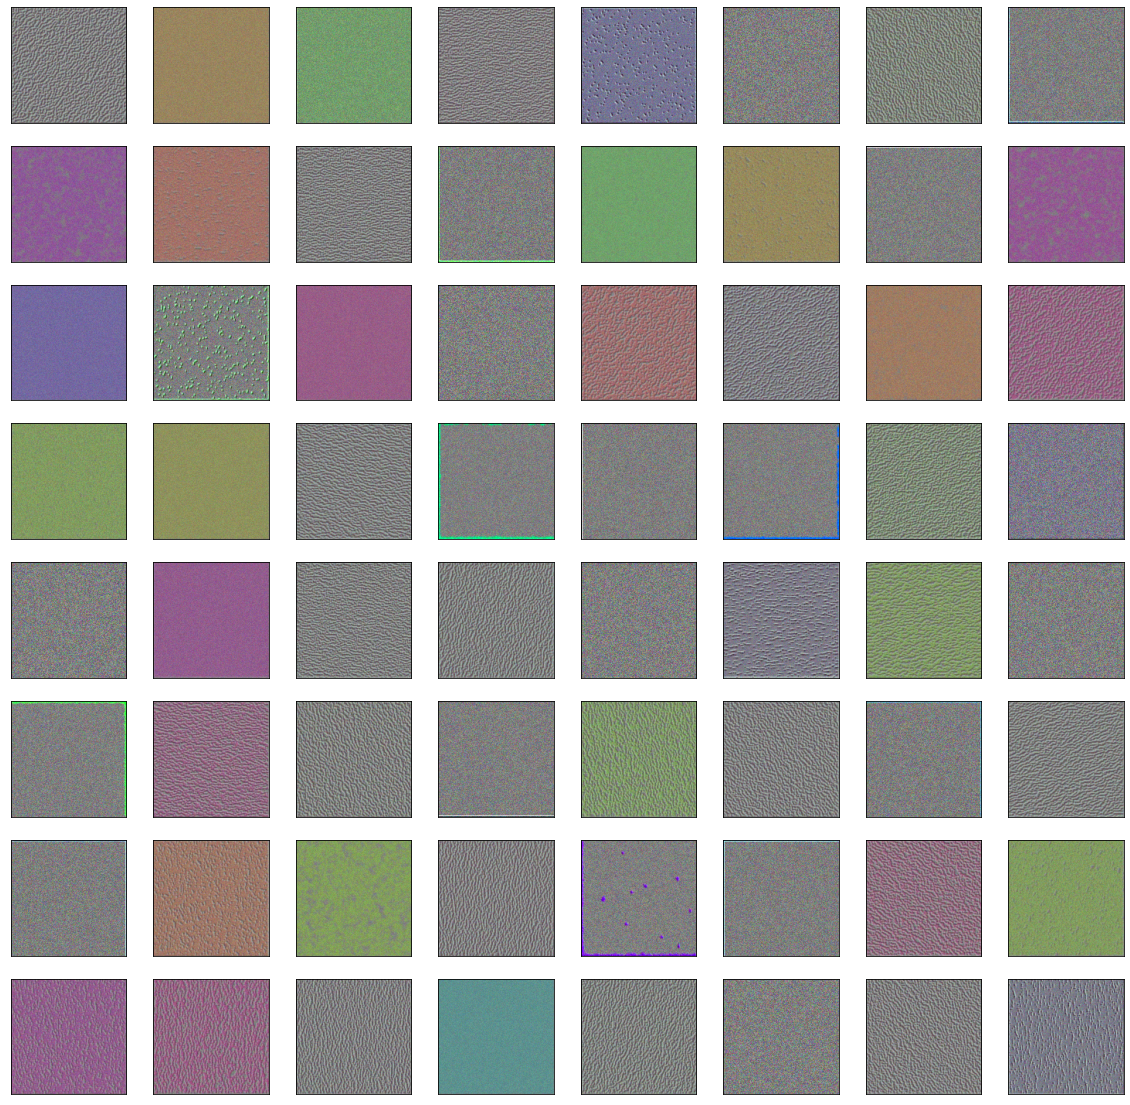

In [95]:
from keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def show_filter(layer_name='block1_conv1', filter_idx=0):

    model = VGG16(weights='imagenet',include_top=False)
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_idx])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])

    #loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
    input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
    step=1.
    # run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    
    img=input_img_data[0]
    
    return deprocess_image(img)

plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(show_filter(layer_name='block1_conv1', filter_idx=i))
    plt.xticks([])
    plt.yticks([])
    
plt.savefig('vgg_block1_conv1.png',dpi=350)

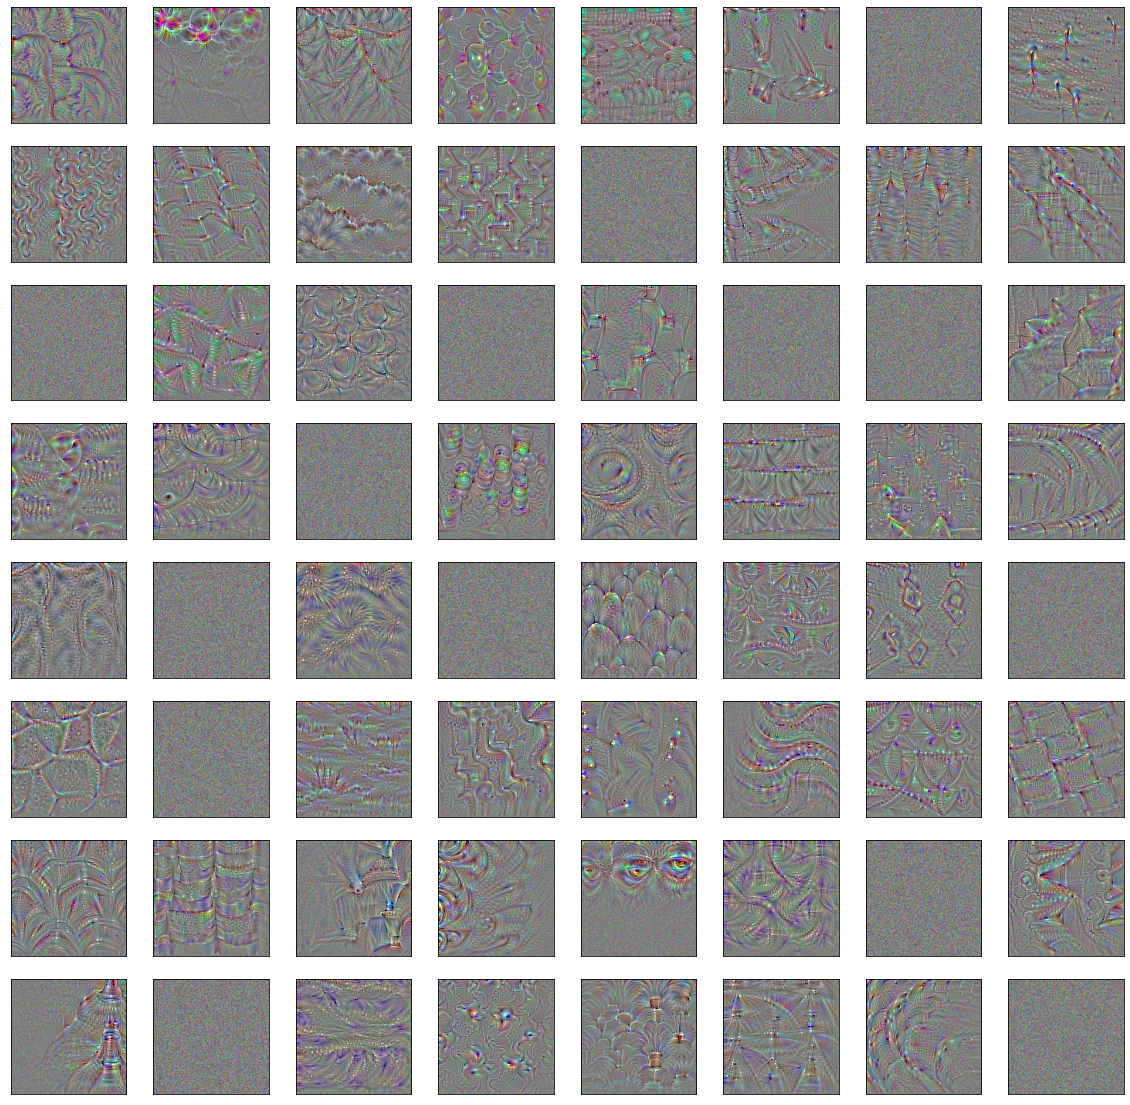

In [96]:
plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(show_filter(layer_name='block5_conv1', filter_idx=i))
    plt.xticks([])
    plt.yticks([])
    
plt.savefig('vgg_block5_conv1.png',dpi=350)

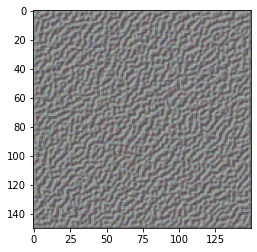

In [66]:
plt.imshow(deprocess_image(input_img_data)[0,:,:,:],cmap='Greys_r')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


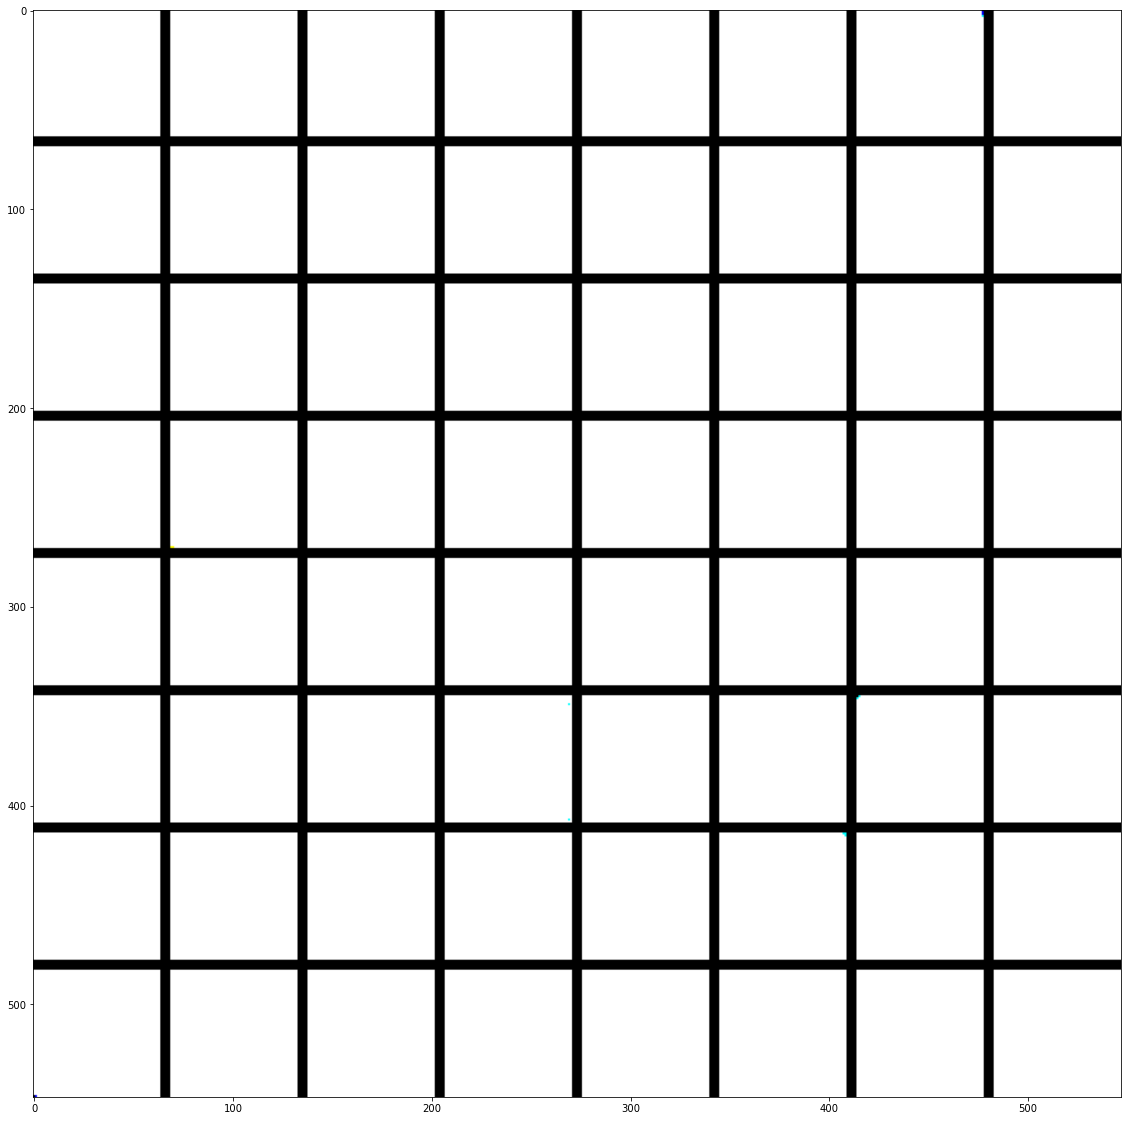

In [60]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

layer_name = 'block1_conv1'
size = 64
margin = 5

# empty black image to store results
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

# iterates over the rows of the results grid
for i in range(8):
    # iterates over the columns of the results grid
    for j in range(8):
        # generates the pattern for i + (j + 8) in layer_name
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        # puts the result in the square (i, j) of the results grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,
                vertical_start: vertical_end, :] = filter_img

# displays the results grid
plt.figure(figsize=(20, 20))
plt.imshow(results)
plt.show()